In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Workspace\Pri\data science and ML practice\jupyter\DataBases\kaggle_dataset\\test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
cat_var=df.select_dtypes(include="object")
cat_var.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
miss_value_percntg = cat_var.isnull().mean()*100
#miss_value_percntg.head()
print(miss_value_percntg)
miss_value_percntg.shape

MSZoning          0.274160
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
KitchenQual       0.068540
Functional        0.137080
FireplaceQu      50.034270
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
P

(43,)

In [6]:
find_var = miss_value_percntg[ miss_value_percntg > 20 ].keys()   
print(find_var)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [7]:
drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

cat_var.drop( columns= drop,axis=1 ,inplace= True)
cat_var.shape

(1459, 38)

In [8]:
isnull_per = cat_var.isnull().mean()*100
isnull_per.shape

(38,)

In [9]:
missng_vars = isnull_per[ isnull_per > 0].keys()
missng_vars

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'SaleType'],
      dtype='object')

In [10]:
cat_var['MSZoning'].mode()  # in catogirical_feild('MSZoning') to fine which value is more or repeated (RL)

0    RL
Name: MSZoning, dtype: object

In [11]:
cat_var['MasVnrType'].mode()  # in catogirical_feild('MasVnrType') to fine which value is more or repeated (None), so it is 
                              # considered as mode value * here mode is "none"

0    None
Name: MasVnrType, dtype: object

In [12]:
cat_var['MasVnrType'].fillna('Missing') # just an example ,* not using "missing" foe actual program

0          None
1       BrkFace
2          None
3       BrkFace
4          None
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [13]:
cat_var['MasVnrType'].value_counts()  # here you can see "none" is maximum(mode) so we are using this value to fill

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [14]:
cat_var['MasVnrType'].fillna(cat_var['MasVnrType'].mode()[0]) # here we are accessing "none" by using 0 and filling 
                                                              # mode value.

0          None
1       BrkFace
2          None
3       BrkFace
4          None
         ...   
1454       None
1455       None
1456       None
1457       None
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [15]:
for var in missng_vars:
    cat_var[var].fillna(cat_var[var].mode()[0], inplace = True)
    print(var,"=",cat_var[var].mode()[0])
    
# using this code we can see what value as a mode going to fill in the variable
# Now data is clean or fill with all value

MSZoning = RL
Utilities = AllPub
Exterior1st = VinylSd
Exterior2nd = VinylSd
MasVnrType = None
BsmtQual = TA
BsmtCond = TA
BsmtExposure = No
BsmtFinType1 = GLQ
BsmtFinType2 = Unf
KitchenQual = TA
Functional = Typ
GarageType = Attchd
GarageFinish = Unf
GarageQual = TA
GarageCond = TA
SaleType = WD


In [16]:
cat_var.isnull().sum()     # data is clean  

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

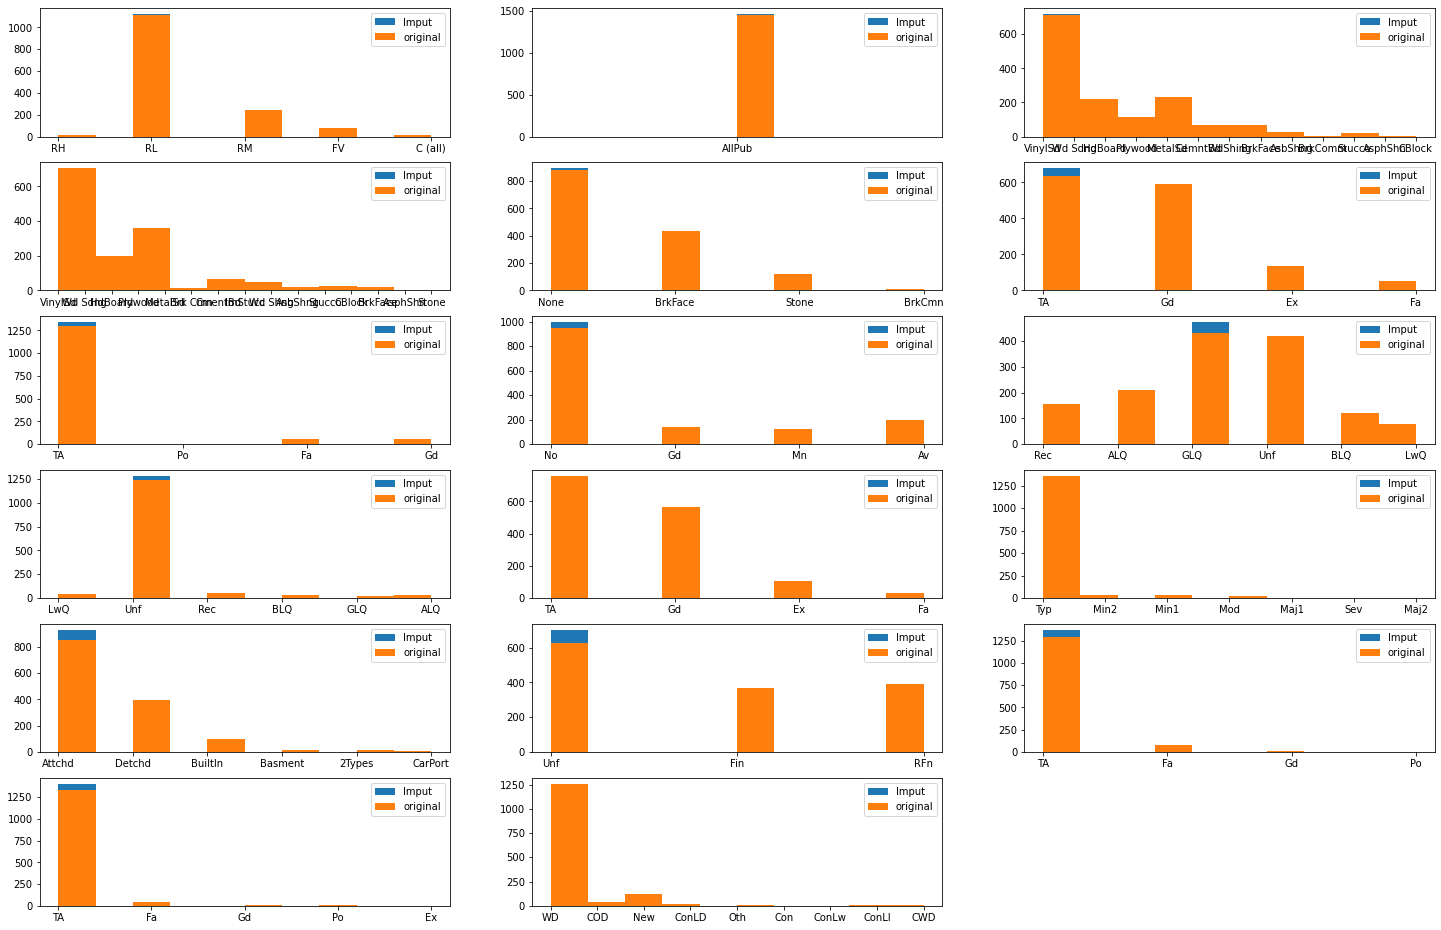

In [21]:
# to see visualy data distrbution of original data and modified data

plt.figure(figsize=(25,25))
for i, var in enumerate(missng_vars):
    plt.subplot(9,3,i+1)
    plt.hist(cat_var[var], label='Imput')
    plt.hist(df[var].dropna(), label='original')
    plt.legend()               

In [24]:
# to update original dataset with new modified 


df.update(cat_var)
df.drop(columns=drop, inplace= True)

In [25]:
# now you can see original data, its clean


df.select_dtypes(include="object").isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64